# Note

* All airline, all price
* 2023-07-13 : initial: all airlines, remove outlier, LR, simplify isotonic
* 2023-07-30 : remove 30 days fitting, update simplify isotonic
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# get_slope

In [2]:
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [3]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept

In [4]:
def get_intercept(x1, y1, x2, y2, b1):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [5]:
get_slope(-18, 63, -1,20.94)

-2.4741176470588235

In [6]:
get_intercept(-18, 63, -1,20.94, get_slope(-18, 63, -1,20.94))

18.465882352941176

# get_linear_equation

In [7]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [8]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


In [9]:
get_linear_equation(0.0,4.567)

y = 0.00 + 4.57 *x


# 60 days prior

## Read CSV

In [10]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data_60days\\data_files_for_model\\'

In [11]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_HKG_direct__2023-07-12_16-13-34.csv'
df = pd.read_csv(file_name)

In [12]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0     LON-to-HKG  British Airways  direct      24/5        2023-05-24   
1     LON-to-HKG  British Airways  direct      24/5        2023-05-24   
2     LON-to-HKG   Cathay Pacific  direct      24/5        2023-05-24   
3     LON-to-HKG   Cathay Pacific  direct      24/5        2023-05-24   
4     LON-to-HKG   Cathay Pacific  direct      24/5        2023-05-24   
...          ...              ...     ...       ...               ...   
1244  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1245  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1246  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1247  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1248  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   

       search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0     2023-03-25                 -60         526.0                 599.0   
1     2023-03-25                 -60         593.0                 599.0   
2     2023-03-25                 -60         486.0                 527.0   
3     2023-03-25                 -60         518.0                 527.0   
4     2023-03-25                 -60         535.0                 527.0   
...          ...                 ...           ...                   ...   
1244  2023-05-26                  -4         507.0                 509.0   
1245  2023-05-27                  -3         510.0                 509.0   
1246  2023-05-28                  -2         520.0                 509.0   
1247  2023-05-28                  -2         528.0                 509.0   
1248  2023-05-29                  -1         512.0                 509.0   

      col_saving_rate col_day_of_week  
0           12.186978       Wednesday  
1            1.001669       Wednesday  
2            7.779886       Wednesday  
3            1.707780       Wednesday  
4           -1.518027       Wednesday  
...               ...             ...  
1244         0.392927         Tuesday  
1245        -0.196464         Tuesday  
1246        -2.161100         Tuesday  
1247        -3.732809         Tuesday  
1248        -0.589391         Tuesday  

[1249 rows x 11 columns]

## plot graph

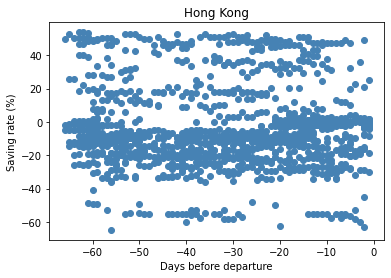

In [13]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## Remove outlier

In [14]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df['col_saving_rate'].quantile(0.5)
Q1 = df['col_saving_rate'].quantile(0.25)
Q3 = df['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['col_saving_rate']>=upper)[0]
lower_array = np.where(df['col_saving_rate']<=lower)[0]
 
# # Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", df.shape)

median -8.3491
Q1 -18.4615,Q3 2.5000, IQR 20.9615, upper 33.9423,lower -49.9038
New Shape:  (1052, 11)


## plot graph (af remove outlier)

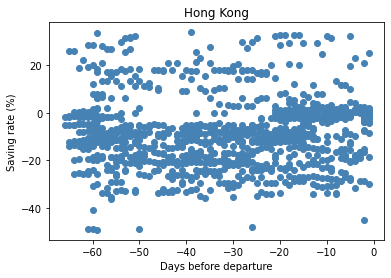

In [15]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## 1) LR

In [16]:
import numpy as np

x = []
y = []
for index, row in df.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(1052, 1052)

Linear regression------------------------------
Coefficients: [[0.03824328]] 
Intercept: [-7.27126326]
y_hat = -7.27 + 0.04 x
Mean squared error: 208.97
Mean absolute error: 10.92
Coefficient of determination: 0.00


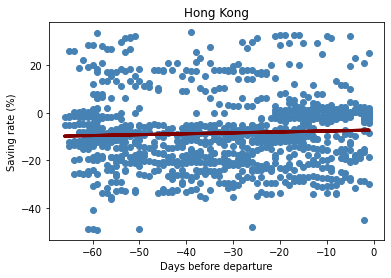

In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , '+ %.2f' % lnr_clf.coef_[0][0], 'x' )

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x, lnr_y_pred, color="maroon", linewidth=3)

plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## 2) Isotonic

In [18]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0     LON-to-HKG  British Airways  direct      24/5        2023-05-24   
1     LON-to-HKG  British Airways  direct      24/5        2023-05-24   
2     LON-to-HKG   Cathay Pacific  direct      24/5        2023-05-24   
3     LON-to-HKG   Cathay Pacific  direct      24/5        2023-05-24   
4     LON-to-HKG   Cathay Pacific  direct      24/5        2023-05-24   
...          ...              ...     ...       ...               ...   
1244  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1245  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1246  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1247  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   
1248  LON-to-HKG   Cathay Pacific  direct      30/5        2023-05-30   

       search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0     2023-03-25                 -60         526.0                 599.0   
1     2023-03-25                 -60         593.0                 599.0   
2     2023-03-25                 -60         486.0                 527.0   
3     2023-03-25                 -60         518.0                 527.0   
4     2023-03-25                 -60         535.0                 527.0   
...          ...                 ...           ...                   ...   
1244  2023-05-26                  -4         507.0                 509.0   
1245  2023-05-27                  -3         510.0                 509.0   
1246  2023-05-28                  -2         520.0                 509.0   
1247  2023-05-28                  -2         528.0                 509.0   
1248  2023-05-29                  -1         512.0                 509.0   

      col_saving_rate col_day_of_week  
0           12.186978       Wednesday  
1            1.001669       Wednesday  
2            7.779886       Wednesday  
3            1.707780       Wednesday  
4           -1.518027       Wednesday  
...               ...             ...  
1244         0.392927         Tuesday  
1245        -0.196464         Tuesday  
1246        -2.161100         Tuesday  
1247        -3.732809         Tuesday  
1248        -0.589391         Tuesday  

[1052 rows x 11 columns]

In [19]:
x = df['col_days_bf_depart'].to_numpy()
y = df['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (1052,), numpy.ndarray, (1052,))

Iso ------------------------------
param: 
{'increasing': 'auto', 'out_of_bounds': 'nan', 'y_max': None, 'y_min': None}
Mean squared error: 206.68
Mean absolute error: 10.74
Coefficient of determination: 0.01


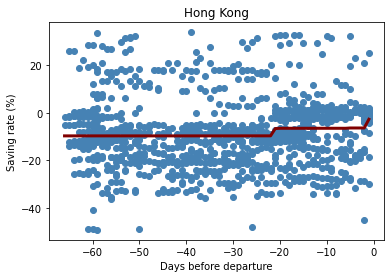

In [20]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = 'auto')

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Iso " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

In [21]:
iso_clf.X_thresholds_, len(iso_clf.X_thresholds_)

(array([-66., -29., -28., -22., -21., -20.,  -6.,  -5.,  -2.,  -1.]), 10)

In [22]:
iso_clf.y_thresholds_

array([-9.70239449, -9.70239449, -9.68820116, -9.68820116, -6.63656662,
       -6.51510784, -6.51510784, -6.39186645, -6.39186645, -2.72855884])

Isotonic Regression------------------------------


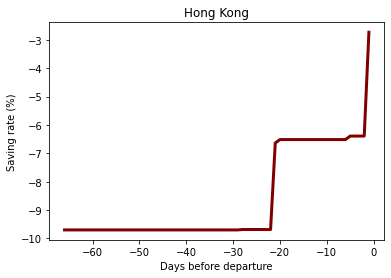

In [23]:
print("Isotonic Regression" + "-"*30)
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)
plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Simplify

Simplified Isotonic Regression


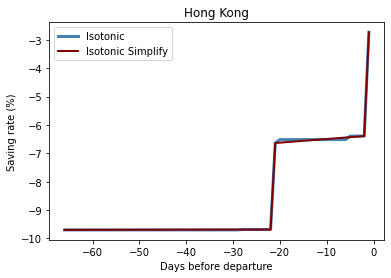

In [24]:
x_sim = [-66 ,-22 ,-21 ,-2 ,-1]
y_sim = [-9.70239449 ,-9.68820116 ,-6.63656662 ,-6.39186645 ,-2.72855884 ]

print("Simplified Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color="steelblue", linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color="maroon", linewidth=2, label="Isotonic Simplify")

plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.legend()
plt.show()

### Equation

In [25]:
x_sim, y_sim

([-66, -22, -21, -2, -1],
 [-9.70239449, -9.68820116, -6.63656662, -6.39186645, -2.72855884])

In [26]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-66,-22]
slope  0.0003225756818181693
-66 -9.70239449 -22 -9.68820116 0.0003225756818181693
intercept  -9.681104495000001
y = -9.68 + 0.00 *x
------------------------------ 
 2: x in [-22,-21]
slope  3.0516345400000002
-22 -9.68820116 -21 -6.63656662 3.0516345400000002
intercept  57.44775872000001
y = 57.45 + 3.05 *x
------------------------------ 
 3: x in [-21,-2]
slope  0.012878956315789461
-21 -6.63656662 -2 -6.39186645 0.012878956315789461
intercept  -6.366108537368421
y = -6.37 + 0.01 *x
------------------------------ 
 4: x in [-2,-1]
slope  3.6633076100000004
-2 -6.39186645 -1 -2.72855884 3.6633076100000004
intercept  0.9347487700000006
y = 0.93 + 3.66 *x


### MSE

In [27]:
def predict_HKG(x):
    y = 0
    if x >= -66 and x < -22 :
        y = -9.68
    elif x >= -22 and x < -21:
        y = 57.45 + 3.05 *x
    elif x >= -21 and x < -2:
        y = -6.37 + 0.01 *x
    else:
        y = 0.93 + 3.66 *x
    return y

Iso (simpliflied)------------------------------
Mean squared error: 206.71
Mean absolute error: 10.74
Coefficient of determination: 0.01


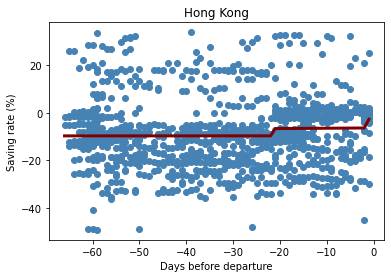

In [28]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(predict_HKG(i))

print("Iso (simpliflied)" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color="steelblue")
plt.plot(x_sim, y_sim, color="maroon", linewidth=3)
plt.title("Hong Kong")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

### Result

* price decrease after day -22,-21, and rapidly decrease after day -1